In [40]:
import pandas as pd
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

In [41]:
manual_df = pd.read_excel("Main Evaluation Files/Working_Sample_Classification.xlsx")
gemini_df = pd.read_csv("Main Evaluation Files/Gemini_raw_output_v6.csv")
davinci_df = pd.read_csv("Main Evaluation Files/davinci-003-Classification_v2.csv")
gpt_35_turbo_df = pd.read_csv("Main Evaluation Files/GPT_35_turbo_raw_output_v3.csv")
gpt_4_turbo_df = pd.read_csv("Main Evaluation Files/GPT-4-TURBO_raw_output_v2.csv")


C:\Users\mm0450.MAVEN\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [42]:
manual_df.info()
gemini_df.info()
davinci_df.info()
gpt_35_turbo_df.info()
gpt_4_turbo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              502 non-null    int64  
 1   title           502 non-null    object 
 2   ingredients     502 non-null    object 
 3   Unnamed: 3      0 non-null      float64
 4   directions      502 non-null    object 
 5   link            502 non-null    object 
 6   source          502 non-null    object 
 7   NER             502 non-null    object 
 8   site            502 non-null    object 
 9   classification  502 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                500 non-null    int64 
 1   title             500 non-null    object
 2 

In [43]:
def display_confusion_matrix(cm):
    # Creating a heatmap using Seaborn
    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
                xticklabels=['Predicted Veg', 'Predicted Vegan', 'Predicted NonVeg'],
                yticklabels=['Actual Veg', 'Actual Vegan', 'Actual NonVeg'])

    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [44]:
def print_metrics(actual_values,annotated_values):
    # Calculation of Metrics
    precision = precision_score(actual_values,annotated_values,average='weighted')
    accuracy = accuracy_score(actual_values,annotated_values)
    recall = recall_score(actual_values,annotated_values,average='weighted')
    f1 = f1_score(actual_values,annotated_values,average='weighted')

    print("Precision: ",precision)
    print("Accuracy: ",accuracy)
    print("Recall: ",recall)
    print("F1: ",f1)


In [45]:
# Join manual with Gemini
gemini_join = manual_df.join(gemini_df['Gemini_OP'], on='id',how='inner')

In [46]:
# Calculation of Metrics
actual_values = gemini_join['classification']
annotated_values = gemini_join['Gemini_OP']

gemini_cm = confusion_matrix(actual_values,annotated_values)
print_metrics(actual_values=actual_values,annotated_values=annotated_values)


Precision:  0.7063138176618963
Accuracy:  0.724
Recall:  0.724
F1:  0.7090221691786583


In [47]:
# Join with davinci
davinci_join = manual_df.join(davinci_df['GPT_OP'],on="id",how='inner')

In [48]:
davinci_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 500
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              501 non-null    int64  
 1   title           501 non-null    object 
 2   ingredients     501 non-null    object 
 3   Unnamed: 3      0 non-null      float64
 4   directions      501 non-null    object 
 5   link            501 non-null    object 
 6   source          501 non-null    object 
 7   NER             501 non-null    object 
 8   site            501 non-null    object 
 9   classification  501 non-null    object 
 10  GPT_OP          501 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 47.0+ KB


In [49]:
# Calculation of Metrics
actual_values = davinci_join['classification']
annotated_values = davinci_join['GPT_OP']

davinci_cm = confusion_matrix(actual_values,annotated_values)
print_metrics(actual_values=actual_values,annotated_values=annotated_values)

Precision:  0.6256878385411866
Accuracy:  0.6207584830339321
Recall:  0.6207584830339321
F1:  0.6157384430853079


In [50]:
# Join with GPT-3.5-turbo
gpt_35_join = manual_df.join(gpt_35_turbo_df['GPT_35_turbo_OP'],on="id",how='inner')

In [51]:
# Calculation of Metrics
actual_values = gpt_35_join['classification']
annotated_values = gpt_35_join['GPT_35_turbo_OP']

gpt_35_cm = confusion_matrix(actual_values,annotated_values)
print_metrics(actual_values=actual_values,annotated_values=annotated_values)

Precision:  0.6500151393602798
Accuracy:  0.64
Recall:  0.64
F1:  0.5396661132810684


In [52]:
# Join with GPT-4-turbo
gpt_4_join = manual_df.join(gpt_4_turbo_df['GPT_4_turbo_OP'],on='id',how='inner')

In [53]:
# Calculation of Metrics
actual_values = gpt_4_join['classification']
annotated_values = gpt_4_join['GPT_4_turbo_OP']

gpt_4_cm = confusion_matrix(actual_values,annotated_values)
print_metrics(actual_values=actual_values,annotated_values=annotated_values)

Precision:  0.8184995220419418
Accuracy:  0.7964071856287425
Recall:  0.7964071856287425
F1:  0.7700655162129791


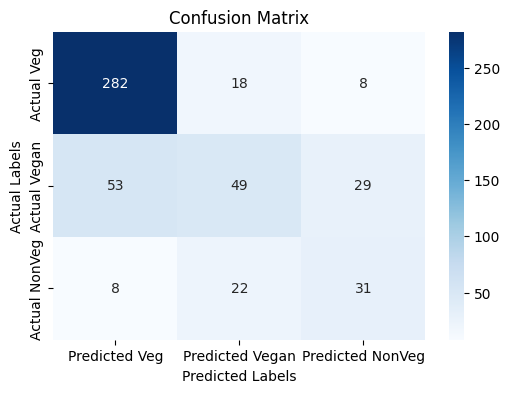

In [54]:
# Gemini Confusion Matrix
display_confusion_matrix(gemini_cm)

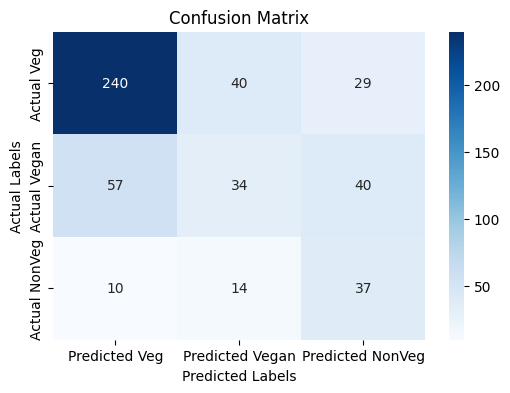

In [55]:
# davinci Confusion Matrix
display_confusion_matrix(davinci_cm)

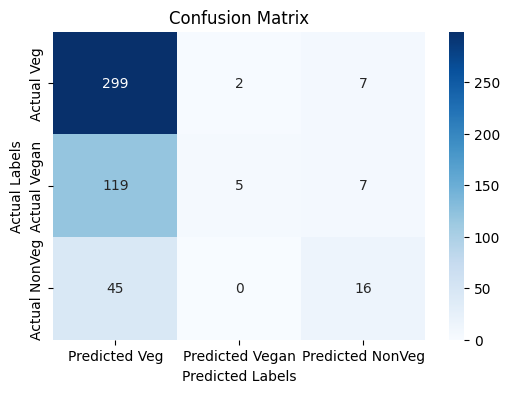

In [56]:
# GPT-3.5-turbo Confusion Matrix
display_confusion_matrix(gpt_35_cm)

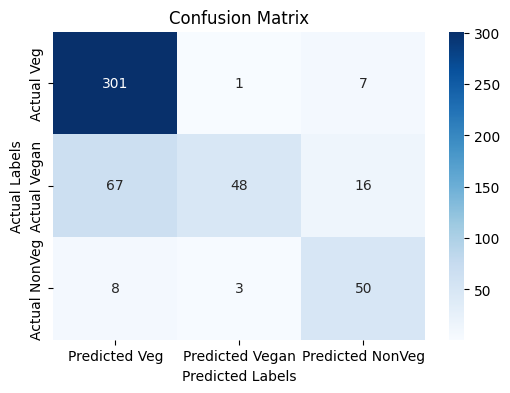

In [57]:
# GPT-4-turbo Confusion Matrix
display_confusion_matrix(gpt_4_cm)